# Análisis exploratorio de Datos GEDI

Análisis exploratorio de datos estructurales de vegetación provenientes de pulsor de Láser del proyecto GEDI. Se entrena con modelos de Palsar-2, Sentinel 1 y 2. Se usa métricas como el estado de la vegtación y estructura de datos Radar.

## 1.Importar librerías

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## 2.Cargar Datos

### Datos CSV

Se carga datos de sentinel 1 y 2, provenientes de un archivo .csv. Además, se agrega los datos palsar que está en una base de datos .db, y se adjuntar por el "id".

In [2]:
datos_sent_1_2 = pd.read_csv('DATA\DATA_GEDI_ESTRCTURA_S1_S2.csv')
datos_sent_1_2.head()

,RFDI,id,DPDD,DpRVIVV,VH,VV,B11,B11_contrast,B11_corr,B11_diss,...,SAVI,Slope,elevation,fhd_normal,N_efectivo_estratos,month,time,year,lon,lat
0,0.147805,37,0.181490,0.686560,0.044054,0.212611,1402.5,9.680916e+11,0.584645,621104.545455,...,0.505120,0.927586,369,3.106986,8.615807,8,2019-08-01 08:00:00,2019,-77.476179,-1.117864
1,0.198458,38,0.089690,0.905287,0.028707,0.098134,1550.0,8.835777e+11,0.534480,610385.227273,...,0.551084,1.311566,369,3.319075,9.980243,8,2019-08-01 08:00:00,2019,-77.476179,-1.118134
2,-0.048516,39,0.229352,0.503965,0.040866,0.283487,1488.5,9.679577e+11,0.702365,645921.590909,...,0.528486,7.435666,371,3.352817,10.216414,8,2019-08-01 08:00:00,2019,-77.475910,-1.118673
3,0.130420,40,0.145603,0.909069,0.046798,0.159116,1104.5,7.593858e+11,0.585595,524107.954545,...,0.407068,3.340522,373,3.316862,9.964946,8,2019-08-01 08:00:00,2019,-77.475371,-1.118942
4,0.269977,41,0.228092,0.577314,0.046556,0.276014,1411.0,6.108494e+11,0.610041,456927.272727,...,0.529927,1.311566,372,3.193762,9.149938,8,2019-08-01 08:00:00,2019,-77.475101,-1.119481


### Datos .DB

In [3]:
conn = sqlite3.connect('DATA/palsar_data.db')
df_paslar_2 = pd.read_sql("SELECT * FROM palsar_data", conn)
df_paslar_2.head()

,id,DpRVIHH,HH,HV,HV_contrast,HV_corr,HV_diss,HV_ent,HV_var
0,37,1.704391,4888.5,3629.5,2.891250e+07,0.211371,4273.364773,5.345972,1.827252e+07
1,38,1.603085,5595.0,3742.0,2.763441e+07,0.282679,4200.443182,5.345972,1.928422e+07
2,39,2.097031,3942.0,4344.0,3.168169e+07,0.263496,4436.804545,5.345972,2.145946e+07
3,40,1.739160,4934.0,3795.5,3.218097e+07,0.304248,4364.476136,5.345972,2.320166e+07
4,41,1.460045,5038.0,2896.0,3.747875e+07,0.350021,4808.880682,5.345972,2.874796e+07


### Unión de datos

In [4]:
df_union_gedi = pd.merge(datos_sent_1_2, df_paslar_2, how='inner', left_on='id', right_on='id')
df_union_gedi.head()

,RFDI,id,DPDD,DpRVIVV,VH,VV,B11,B11_contrast,B11_corr,B11_diss,...,lon,lat,DpRVIHH,HH,HV,HV_contrast,HV_corr,HV_diss,HV_ent,HV_var
0,0.147805,37,0.181490,0.686560,0.044054,0.212611,1402.5,9.680916e+11,0.584645,621104.545455,...,-77.476179,-1.117864,1.704391,4888.5,3629.5,2.891250e+07,0.211371,4273.364773,5.345972,1.827252e+07
1,0.198458,38,0.089690,0.905287,0.028707,0.098134,1550.0,8.835777e+11,0.534480,610385.227273,...,-77.476179,-1.118134,1.603085,5595.0,3742.0,2.763441e+07,0.282679,4200.443182,5.345972,1.928422e+07
2,-0.048516,39,0.229352,0.503965,0.040866,0.283487,1488.5,9.679577e+11,0.702365,645921.590909,...,-77.475910,-1.118673,2.097031,3942.0,4344.0,3.168169e+07,0.263496,4436.804545,5.345972,2.145946e+07
3,0.130420,40,0.145603,0.909069,0.046798,0.159116,1104.5,7.593858e+11,0.585595,524107.954545,...,-77.475371,-1.118942,1.739160,4934.0,3795.5,3.218097e+07,0.304248,4364.476136,5.345972,2.320166e+07
4,0.269977,41,0.228092,0.577314,0.046556,0.276014,1411.0,6.108494e+11,0.610041,456927.272727,...,-77.475101,-1.119481,1.460045,5038.0,2896.0,3.747875e+07,0.350021,4808.880682,5.345972,2.874796e+07


In [11]:
df_union_gedi.columns

Index(['RFDI', 'id', 'DPDD', 'DpRVIVV', 'VH', 'VV', 'B11', 'B11_contrast',
       'B11_corr', 'B11_diss', 'B11_ent', 'B11_var', 'B12', 'B2', 'B3', 'B4',
       'B8', 'EVI', 'GCI', 'MSAVI', 'NDMI', 'NDVI', 'SAVI', 'Slope',
       'elevation', 'fhd_normal', 'N_efectivo_estratos', 'month', 'time',
       'year', 'lon', 'lat', 'DpRVIHH', 'HH', 'HV', 'HV_contrast', 'HV_corr',
       'HV_diss', 'HV_ent', 'HV_var'],
      dtype='object')

In [12]:
df_union_gedi.drop(columns=['id', 'fhd_normal', 'month', 'time',
       'year'], inplace=True)

### Exportar unión de datos

In [13]:
df_union_gedi.to_csv('DATA/df_union_gedi.csv', index=False)
df_union_gedi.columns

Index(['RFDI', 'DPDD', 'DpRVIVV', 'VH', 'VV', 'B11', 'B11_contrast',
       'B11_corr', 'B11_diss', 'B11_ent', 'B11_var', 'B12', 'B2', 'B3', 'B4',
       'B8', 'EVI', 'GCI', 'MSAVI', 'NDMI', 'NDVI', 'SAVI', 'Slope',
       'elevation', 'N_efectivo_estratos', 'lon', 'lat', 'DpRVIHH', 'HH', 'HV',
       'HV_contrast', 'HV_corr', 'HV_diss', 'HV_ent', 'HV_var'],
      dtype='object')

## 3.Exploración

### Estadísticas descriptivas

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_union_gedi.describe()

,RFDI,DPDD,DpRVIVV,VH,VV,B11,B11_contrast,B11_corr,B11_diss,B11_ent,B11_var,B12,B2,B3,B4,B8,EVI,GCI,MSAVI,NDMI,NDVI,SAVI,Slope,elevation,N_efectivo_estratos,lon,lat,DpRVIHH,HH,HV,HV_contrast,HV_corr,HV_diss,HV_ent,HV_var
count,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4.264000e+03,4264.000000,4.264000e+03,4264.000000,4.264000e+03,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4.264000e+03,4264.000000,4264.000000,4264.000000,4.264000e+03
mean,0.242460,0.197055,0.719766,0.047903,0.230775,1451.699930,8.648279e+11,0.723779,5.576921e+05,4.905481,1.844853e+12,627.682458,275.363977,441.601782,242.905019,2946.738626,0.589468,5.808370,0.491949,0.338008,0.846513,0.526078,11.219802,620.515947,8.691014,-77.668679,-1.275918,1.515080,5897.807927,3578.906660,7.214269e+07,0.286883,6438.822726,5.341803,5.176825e+07
std,0.105904,0.142439,0.185077,0.032547,0.172360,238.691459,8.991044e+11,0.099806,2.204110e+05,0.256501,2.359418e+12,154.332276,68.907632,96.334560,91.762590,471.324121,0.071820,0.989675,0.077715,0.065243,0.057933,0.052744,8.074307,183.024640,1.451532,0.200753,0.207581,0.211809,1199.436686,746.790406,3.415512e+07,0.120408,1352.838239,0.027696,2.644062e+07
min,-0.201286,0.003633,0.212418,0.000874,0.004007,769.000000,7.714754e+10,0.155301,1.789727e+05,2.639652,1.159789e+11,333.000000,111.000000,165.000000,72.500000,882.000000,0.029395,0.064030,0.004264,-0.207441,0.012902,0.026498,0.000000,337.000000,1.554568,-78.056131,-1.737971,0.720260,1.000000,1.000000,1.917628e+07,-0.037463,3423.535227,4.387236,1.234975e+07
25%,0.175308,0.114267,0.592181,0.028389,0.130116,1304.875000,3.582897e+11,0.658679,4.059386e+05,4.745833,6.538939e+11,543.500000,242.000000,385.000000,201.375000,2648.000000,0.549624,5.336729,0.447968,0.310624,0.838767,0.499628,4.719510,452.000000,8.095697,-77.797215,-1.359332,1.371710,5082.750000,3070.750000,4.708200e+07,0.201446,5359.167045,5.344240,3.362617e+07
50%,0.247627,0.166300,0.697506,0.040975,0.192857,1409.000000,5.816679e+11,0.732884,5.069273e+05,4.770975,1.095907e+12,591.500000,272.500000,432.500000,231.000000,2940.000000,0.590105,5.835119,0.494738,0.345689,0.856428,0.528772,9.765726,593.000000,9.144283,-77.661591,-1.174323,1.504746,5813.750000,3518.000000,6.436051e+07,0.276749,6236.789773,5.345972,4.667261e+07
75%,0.314145,0.235258,0.827755,0.057455,0.277526,1555.000000,1.018065e+12,0.799316,6.503989e+05,5.090768,2.057684e+12,663.000000,300.000000,480.500000,260.125000,3249.250000,0.631122,6.366663,0.543035,0.376800,0.871011,0.556970,15.414524,777.000000,9.741597,-77.476920,-1.125949,1.649385,6597.250000,4023.125000,8.999779e+07,0.358177,7377.442614,5.345972,6.236896e+07
max,0.639870,1.852989,1.564937,0.392173,2.336199,3688.000000,1.248275e+13,0.946874,2.303622e+06,5.345972,3.458850e+13,3267.000000,1876.000000,2116.000000,2186.000000,4906.500000,0.899757,9.359165,0.732605,0.500924,0.920051,0.707230,68.263885,1094.000000,10.421991,-77.431712,-1.079327,2.402572,15280.000000,7561.000000,4.002324e+08,0.757220,13114.368182,5.345972,3.663413e+08


### Análisis de correlación

Se observa que las variables que mantienen la mayor correlación con la variable objetivo "N_efectivo_estratos", son: la banda B11 con -0.39, la banda 12 con -0.41, y la latitud y longitud con 0.35. Estas variables mantienen una correlación medianamente fuerte

In [16]:
df_union_gedi.corr("spearman")

,RFDI,DPDD,DpRVIVV,VH,VV,B11,B11_contrast,B11_corr,B11_diss,B11_ent,B11_var,B12,B2,B3,B4,B8,EVI,GCI,MSAVI,NDMI,NDVI,SAVI,Slope,elevation,N_efectivo_estratos,lon,lat,DpRVIHH,HH,HV,HV_contrast,HV_corr,HV_diss,HV_ent,HV_var
RFDI,1.000000,-0.007796,0.002631,-0.004494,-0.007634,0.051177,0.110435,-0.024002,0.106403,-0.085336,0.087618,0.068387,0.041632,0.036894,0.006811,0.017473,0.010668,-0.004802,0.006287,-0.028587,0.017151,0.006515,-0.046520,0.057185,-0.062677,-0.051579,-0.070893,-1.000000,0.503477,-0.567602,-0.118118,0.082986,-0.121955,0.014713,-0.091137
DPDD,-0.007796,1.000000,-0.266399,0.893444,0.995405,0.129880,-0.253328,0.026098,-0.258878,0.075347,-0.215260,0.084506,-0.086050,0.032625,0.006124,0.182154,0.176719,0.179773,0.205572,0.112397,0.141911,0.203517,0.030256,-0.025876,0.073716,0.062485,0.018153,0.007796,0.008278,0.018971,-0.040885,0.127880,-0.050643,-0.013380,0.029064
DpRVIVV,0.002631,-0.266399,1.000000,0.139547,-0.344341,0.010336,0.024838,-0.020144,0.021095,-0.036622,0.009098,0.014953,0.048773,0.037678,0.050778,0.010640,0.004423,-0.048456,-0.008281,-0.016491,-0.059258,-0.002648,0.007496,-0.005118,-0.011318,-0.033436,0.031499,-0.002631,-0.007441,-0.010199,0.017690,-0.010024,0.017469,-0.007168,0.009733
VH,-0.004494,0.893444,0.139547,1.000000,0.849308,0.142833,-0.251034,0.024734,-0.258122,0.059992,-0.214052,0.097472,-0.064840,0.053219,0.032595,0.198483,0.187016,0.163431,0.213470,0.111009,0.117735,0.211719,0.035259,-0.026988,0.067428,0.046417,0.032550,0.004494,0.005666,0.012299,-0.034027,0.124149,-0.044902,-0.017300,0.034230
VV,-0.007634,0.995405,-0.344341,0.849308,1.000000,0.125281,-0.248541,0.024552,-0.254028,0.075080,-0.211438,0.080797,-0.087755,0.028335,0.000579,0.175156,0.170868,0.178688,0.199626,0.109748,0.143856,0.197655,0.028374,-0.023093,0.071900,0.062563,0.013054,0.007634,0.008351,0.018940,-0.043756,0.127376,-0.053203,-0.012487,0.025598
B11,0.051177,0.129880,0.010336,0.142833,0.125281,1.000000,0.160458,0.068455,0.130253,-0.146125,0.169483,0.959005,0.333775,0.623419,0.557376,0.663145,0.579504,-0.015659,0.555010,-0.244938,-0.041417,0.612708,-0.179949,0.254498,-0.393163,-0.346545,-0.264782,-0.051177,-0.061923,-0.116758,0.187416,-0.062971,0.191514,-0.067808,0.159022
B11_contrast,0.110435,-0.253328,0.024838,-0.251034,-0.248541,0.160458,1.000000,-0.039611,0.966786,-0.339662,0.884319,0.246104,0.262424,0.191935,0.066391,0.080254,0.078189,-0.116555,0.041340,-0.091516,0.013868,0.036221,0.042737,0.229323,-0.227789,-0.313627,-0.241681,-0.110435,-0.022772,-0.146239,-0.157749,0.191636,-0.170021,-0.013514,-0.097062
B11_corr,-0.024002,0.026098,-0.020144,0.024734,0.024552,0.068455,-0.039611,1.000000,0.067803,0.424004,0.395193,0.048073,0.099605,0.114545,0.156553,0.037676,-0.005525,-0.094540,-0.001787,-0.014050,-0.124025,-0.009666,0.123222,-0.062678,0.000527,0.113593,0.059578,0.024002,-0.022438,0.013436,0.198419,0.086088,0.197244,-0.002412,0.233229
B11_diss,0.106403,-0.258878,0.021095,-0.258122,-0.254028,0.130253,0.966786,0.067803,1.000000,-0.161192,0.910069,0.208425,0.283932,0.181927,0.071828,0.063034,0.066737,-0.123710,0.024465,-0.073830,-0.003835,0.018496,0.100553,0.168089,-0.183626,-0.226101,-0.190551,-0.106403,-0.022129,-0.140001,-0.133643,0.196499,-0.146258,-0.010164,-0.072085
B11_ent,-0.085336,0.075347,-0.036622,0.059992,0.075080,-0.146125,-0.339662,0.424004,-0.161192,1.000000,-0.114205,-0.205227,-0.078536,-0.127966,-0.019938,-0.115595,-0.131463,0.031746,-0.101847,0.039879,-0.059526,-0.121235,0.179970,-0.340154,0.206903,0.510886,0.299852,0.085336,0.007973,0.108100,0.193072,-0.006266,0.196703,0.027501,0.191434


Se genera el mismo análisis pero mediante gráficas de calor

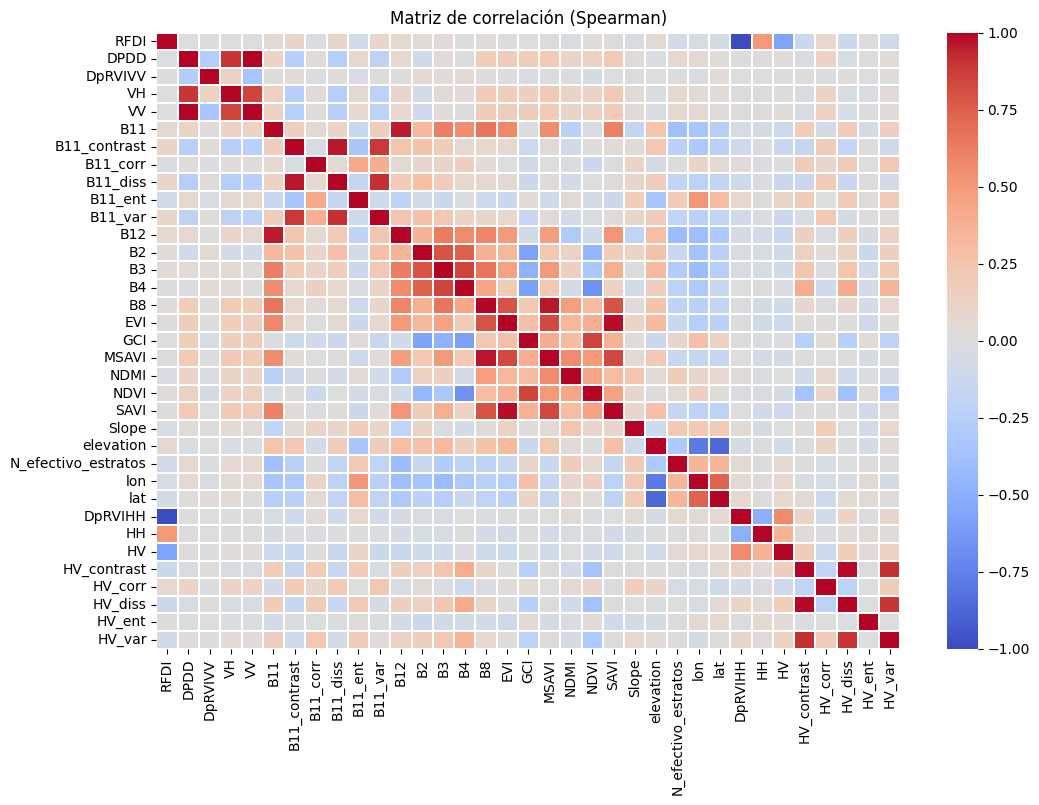

In [23]:
# Gráfico de calor de la matriz de correlación (Spearman) sin mostrar números
plt.figure(figsize=(12, 8))
sns.heatmap(df_union_gedi.corr(method="spearman"), annot=False, cmap="coolwarm", linewidths=0.2)
plt.title("Matriz de correlación (Spearman)")
plt.show()

### Gráficos de dispersión